In [56]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [4]:
# Import data set and do initial exploration
df = pd.read_csv('mobile_services_ranking.csv')
print(df.shape)
print(df.info())
print(df.head())

(16, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
brand      16 non-null object
startup    16 non-null object
monthly    16 non-null object
service    16 non-null object
retail     16 non-null object
apple      16 non-null object
samsung    16 non-null object
google     16 non-null object
ranking    16 non-null int64
dtypes: int64(1), object(8)
memory usage: 1.2+ KB
None
           brand startup monthly   service        retail        apple  \
0         "AT&T"  "$100"  "$100"   "4G NO"   "Retail NO"   "Apple NO"   
1      "Verizon"  "$300"  "$100"   "4G NO"  "Retail YES"  "Apple YES"   
2  "US Cellular"  "$400"  "$200"   "4G NO"   "Retail NO"   "Apple NO"   
3      "Verizon"  "$400"  "$400"  "4G YES"  "Retail YES"   "Apple NO"   
4      "Verizon"  "$200"  "$300"   "4G NO"   "Retail NO"   "Apple NO"   

         samsung       google  ranking  
0   "Samsung NO"   "Nexus NO"       11  
1  "Samsung YES"   "Nexus NO"       12  
2  "

In [26]:
# Rename df columns and clean data set for better analysis. 
df.columns = ['brand', 'startup', 'monthly', 'service4g', 'retail', 'apple', 'samsung', 'nexus', 
              'ranking']

# Remove quotation marks and dollar sign to convert startup and monthly columns to numeric. 
df['startup'] = df['startup'].replace('["$]', '', regex=True).astype(str).astype(float)
df['monthly'] = df['monthly'].replace('["$]', '', regex=True).astype(str).astype(float)

# Retain YES-NO for following columns to allow for easier understanding and one-hot encoding. 
to_clean = ['service4g', 'retail', 'apple', 'samsung', 'nexus']
for i in to_clean:
    df[i] = df[i].replace('^[A-Za-z0-9]*\s+', '', regex=True)
    df[i] = df[i].replace('"', '', regex=True)

# Display cleaned dataframe. 
df.head()

,brand,startup,monthly,service4g,retail,apple,samsung,nexus,ranking
0,"""AT&T""",100.0,100.0,NO,NO,NO,NO,NO,11
1,"""Verizon""",300.0,100.0,NO,YES,YES,YES,NO,12
2,"""US Cellular""",400.0,200.0,NO,NO,NO,YES,NO,9
3,"""Verizon""",400.0,400.0,YES,YES,NO,NO,NO,2
4,"""Verizon""",200.0,300.0,NO,NO,NO,YES,YES,8


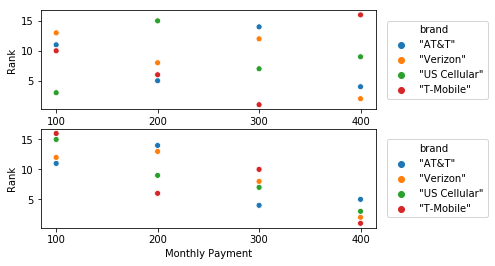

In [33]:
# Plots to view how startup and monthly payments affect rank. 
plt.subplot(2, 1, 1)
sns.scatterplot(x='startup', y='ranking', data=df, hue='brand')
_ = plt.legend(loc='center right', bbox_to_anchor = [1.35, 0.5])
_ = plt.xlabel('Startup Payment')
_ = plt.ylabel('Rank')
_ = plt.xticks(np.arange(100, 401, 100))

plt.subplot(2, 1, 2)
sns.scatterplot(x='monthly', y='ranking', data=df, hue='brand')
_ = plt.legend(loc='center right', bbox_to_anchor = [1.35, 0.5])
_ = plt.xlabel('Monthly Payment')
_ = plt.ylabel('Rank')
_ = plt.xticks(np.arange(100, 401, 100))

plt.show()

It's interesting that Startup payment (top graph) doesn't appear to have an effect on rank but monthly payment does. Higher monthly payments have lower ranks, meaning that people may be willing to pay a high monthly payment for better services provided, regardless of the carrier.  